In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
print(torch.__version__)

1.11.0+cu115


In [9]:
# 构造一下四个变量线性回归的shuju
num_inputs = 4
N = 3000
true_w = torch.tensor([-9, 8.7, -6.5, 4.3]).reshape(-1, 1)
true_b = torch.tensor([-6.4])

features = torch.rand(size=(N, num_inputs)) * 10
labels = torch.matmul(features, true_w)
noise = torch.normal(size=labels.size(), mean=0, std=0.5)
features, labels

(tensor([[7.0538, 2.3934, 9.1497, 0.9231],
         [4.5849, 8.4753, 6.7901, 3.7191],
         [4.6052, 7.5615, 7.2242, 7.2444],
         ...,
         [6.4235, 3.0051, 2.5557, 0.7602],
         [2.4472, 8.5064, 4.7663, 7.1561],
         [3.6016, 9.7685, 1.5747, 1.8431]]),
 tensor([[-98.1653],
         [  4.3272],
         [  8.5327],
         ...,
         [-45.0101],
         [ 51.7717],
         [ 50.2615]]))

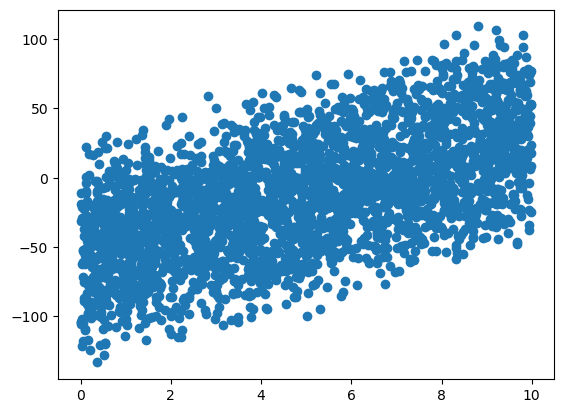

In [16]:
plt.scatter(features[:, 1], labels)
plt.show()

In [20]:
import torch.utils.data as Data

batch_size = 50

dataset = Data.TensorDataset(features, labels)
data_iter = Data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

for X, y in data_iter:
    print(X.size(), y.size())
    break

torch.Size([50, 4]) torch.Size([50, 1])


In [25]:
import torch.nn as nn
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super().__init__()
        self.linear = nn.Linear(n_feature, 1)
print(LinearNet(num_inputs))

LinearNet(
  (linear): Linear(in_features=4, out_features=1, bias=True)
)
